In [56]:
import pandas as pd
import os


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import GridSearchCV

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn import metrics
import matplotlib.pyplot as plt


import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)

In [2]:
os.getcwd()

'c:\\Users\\sylva\\Desktop\\nflpredictor\\nfl\\03_modelisation\\modelisation_final_dataset'

In [6]:
df = pd.read_csv("../../04_datasets/nfl_dataset_vf.csv", index_col=0)
df.head()

,season,week,awayteam,hometeam,idgame,winner_home,home_coach,away_coach,weather_type,temperature,...,punt_return_yds_MA_5_home,kicking_pts_MA_5_home,delta_day_away,delta_day_home,stade,location,people,month,dayofmonth,dayofweek
0,2017,13,Vikings,Falcons,400951677,0,Dan Quinn,Mike Zimmer,NaN,NaN,...,10.4,9.4,10.0,7.0,Mercedes-Benz Stadium,"Atlanta, GA",95.0,12,3,6
1,2017,9,Falcons,Panthers,400951749,1,Ron Rivera,Dan Quinn,cloudy,61.0,...,22.4,7.4,7.0,7.0,Bank of America Stadium,"Charlotte, NC",100.0,11,5,6
2,2017,9,Bengals,Jaguars,400951753,1,Doug Marrone,Marvin Lewis,NaN,78.0,...,0.4,8.4,7.0,14.0,TIAA Bank Field,"Jacksonville, FL",89.0,11,5,6
3,2017,4,Bears,Packers,400951678,1,Mike McCarthy,John Fox,cloudy,65.0,...,NaN,NaN,4.0,4.0,Lambeau Field,"Green Bay, WI",97.0,9,29,4
4,2017,9,Colts,Texans,400951751,0,Bill O'Brien,Chuck Pagano,cloudy,84.0,...,31.4,9.0,7.0,6.0,NRG Stadium,"Houston, TX",100.0,11,5,6


In [7]:
# checking the amount of lines in the dataframe (there shoulb be one line per game)
len(df)

1289

In [8]:
print(df.columns.tolist())

['season', 'week', 'awayteam', 'hometeam', 'idgame', 'winner_home', 'home_coach', 'away_coach', 'weather_type', 'temperature', 'humidity', 'wind', 'streak_away', 'pass_yds_MA_5_away', 'pass_td_MA_5_away', 'rush_yds_MA_5_away', 'rush_td_MA_5_away', 'rec_yds_MA_5_away', 'rec_td_MA_5_away', 'fumbles_MA_5_away', 'fumbles_rec_MA_5_away', 'defense_sacks_MA_5_away', 'defense_td_MA_5_away', 'interceptions_MA_5_away', 'interceptions_td_MA_5_away', 'kicks_return_yds_MA_5_away', 'kicks_return_td_MA_5_away', 'punt_return_yds_MA_5_away', 'kicking_pts_MA_5_away', 'streak_home', 'pass_yds_MA_5_home', 'pass_td_MA_5_home', 'rush_yds_MA_5_home', 'rush_td_MA_5_home', 'rec_yds_MA_5_home', 'rec_td_MA_5_home', 'fumbles_MA_5_home', 'fumbles_rec_MA_5_home', 'defense_sacks_MA_5_home', 'defense_td_MA_5_home', 'interceptions_MA_5_home', 'interceptions_td_MA_5_home', 'kicks_return_yds_MA_5_home', 'kicks_return_td_MA_5_home', 'punt_return_yds_MA_5_home', 'kicking_pts_MA_5_home', 'delta_day_away', 'delta_day_home',

In [9]:
print("Number of rows : {}".format(df.shape[0]))
print()

print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Number of rows : 1289

Basics statistics: 


,season,week,awayteam,hometeam,idgame,winner_home,home_coach,away_coach,weather_type,temperature,...,punt_return_yds_MA_5_home,kicking_pts_MA_5_home,delta_day_away,delta_day_home,stade,location,people,month,dayofmonth,dayofweek
count,1289.000000,1289.000000,1289,1289,1.289000e+03,1289.000000,1289,1289,1043,1179.000000,...,1175.000000,1175.000000,1245.000000,1239.000000,1289,1289,1140.000000,1289.000000,1289.000000,1289.000000
unique,NaN,NaN,32,32,NaN,NaN,63,63,7,NaN,...,NaN,NaN,NaN,NaN,37,35,NaN,NaN,NaN,NaN
top,NaN,NaN,Seahawks,Titans,NaN,NaN,Sean McDermott,Kyle Shanahan,cloudy,NaN,...,NaN,NaN,NaN,NaN,MetLife Stadium,"East Rutherford, NJ",NaN,NaN,NaN,NaN
freq,NaN,NaN,41,41,NaN,NaN,41,41,522,NaN,...,NaN,NaN,NaN,NaN,81,81,NaN,NaN,NaN,NaN
mean,2019.027153,9.175330,NaN,NaN,4.011341e+08,0.539178,NaN,NaN,NaN,56.229008,...,14.448170,6.968000,19.679518,19.593220,NaN,NaN,88.013158,10.254461,16.082234,5.098526
std,1.422984,5.062066,NaN,NaN,1.338832e+05,0.498656,NaN,NaN,NaN,22.435574,...,8.710801,1.811904,53.993547,54.142582,NaN,NaN,24.114280,2.123613,8.765195,1.920486
min,2017.000000,1.000000,NaN,NaN,4.009502e+08,0.000000,NaN,NaN,NaN,1.000000,...,-1.800000,1.600000,3.000000,3.000000,NaN,NaN,1.000000,1.000000,1.000000,0.000000
25%,2018.000000,5.000000,NaN,NaN,4.010308e+08,0.000000,NaN,NaN,NaN,44.000000,...,8.200000,5.800000,6.000000,6.000000,NaN,NaN,91.000000,10.000000,9.000000,6.000000
50%,2019.000000,9.000000,NaN,NaN,4.011280e+08,1.000000,NaN,NaN,NaN,61.000000,...,12.600000,7.000000,7.000000,7.000000,NaN,NaN,97.000000,11.000000,16.000000,6.000000
75%,2020.000000,14.000000,NaN,NaN,4.012203e+08,1.000000,NaN,NaN,NaN,73.000000,...,18.800000,8.200000,7.000000,7.000000,NaN,NaN,100.000000,12.000000,24.000000,6.000000



Percentage of missing values: 


season                         0.000000
week                           0.000000
awayteam                       0.000000
hometeam                       0.000000
idgame                         0.000000
winner_home                    0.000000
home_coach                     0.000000
away_coach                     0.000000
weather_type                  19.084562
temperature                    8.533747
humidity                       7.447634
wind                          13.343677
streak_away                    2.249806
pass_yds_MA_5_away             8.456168
pass_td_MA_5_away              8.456168
rush_yds_MA_5_away             8.456168
rush_td_MA_5_away              8.456168
rec_yds_MA_5_away              8.456168
rec_td_MA_5_away               8.456168
fumbles_MA_5_away              8.456168
fumbles_rec_MA_5_away          8.456168
defense_sacks_MA_5_away        8.456168
defense_td_MA_5_away           8.456168
interceptions_MA_5_away        8.456168
interceptions_td_MA_5_away     8.456168


Preprocessing with awayteam and hometeam

In [12]:
Y = df.loc[:,"winner_home"]
X = df.loc[:,['awayteam','hometeam']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify = Y)

# select automatically the numerical and categorical columns
num_col = X.select_dtypes([np.number]).columns
cat_col = X.select_dtypes("object").columns

# Create pipeline for numeric features
numeric_features = X.select_dtypes([np.number]).columns 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values in Age will be replaced by columns' mean
    ('scaler', StandardScaler())])

# Create pipeline for categorical features
categorical_features = X.select_dtypes("object").columns 
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTranformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


Logistic Regression

In [13]:
model = LogisticRegression()
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))

Accuracy on training set :  0.6741028128031038
Accuracy on test set :  0.6317829457364341


RandomForest

In [14]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, Y_train)

Y_train_pred = model_rf.predict(X_train)
Y_test_pred = model_rf.predict(X_test)

print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))

Accuracy on training set :  0.8709990300678953
Accuracy on test set :  0.5775193798449613


XGBClassifier

In [15]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, Y_train)

Y_train_pred = model_xgb.predict(X_train)
Y_test_pred = model_xgb.predict(X_test)

print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))

Accuracy on training set :  0.7051406401551892
Accuracy on test set :  0.6511627906976745


## Preprocessing with all features

In [57]:
Y = df.loc[:,"winner_home"]
X = df.loc[:,[c for c in df.columns if ((c!="winner_home") and (c!='idgame'))]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify = Y)

# select automatically the numerical and categorical columns
num_col = X.select_dtypes([np.number]).columns
cat_col = X.select_dtypes("object").columns

# Create pipeline for numeric features
numeric_features = X.select_dtypes([np.number]).columns 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values in Age will be replaced by columns' mean
    ('scaler', StandardScaler())])

# Create pipeline for categorical features
categorical_features = X.select_dtypes("object").columns 
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first', handle_unknown = 'ignore')) # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTranformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

c:\Users\sylva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning:

Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros



Logistic Regression

In [58]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))

Accuracy on training set :  0.7255092143549952
Accuracy on test set :  0.6317829457364341


RandomForest

In [59]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, Y_train)

Y_train_pred = model_rf.predict(X_train)
Y_test_pred = model_rf.predict(X_test)

print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))

Accuracy on training set :  1.0
Accuracy on test set :  0.624031007751938


XGBoost

In [60]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, Y_train)

Y_train_pred = model_xgb.predict(X_train)
Y_test_pred = model_xgb.predict(X_test)

print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))

Accuracy on training set :  1.0
Accuracy on test set :  0.5736434108527132


Visualisation

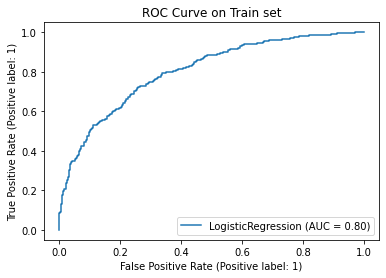

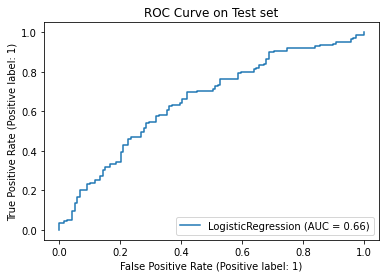

In [61]:
# Visualize ROC curves
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Train set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(model, X_train, Y_train, ax=ax) # RocCurveDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Test set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(model, X_test, Y_test, ax=ax) # RocCurveDisplay from sklearn
plt.show()

Features importance

In [62]:
# Perform grid search
print("Grid search...")
classifier = RandomForestClassifier()

# Grid of values to be tested
params = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 8],
    'n_estimators': [10, 20, 40, 60, 80, 100]
}
gridsearch = GridSearchCV(classifier, param_grid = params, cv = 5, n_jobs=-1) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 60}
Best validation accuracy :  0.6071947844847803


In [63]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = gridsearch.predict_proba(X_train)
print("...Done.")

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = gridsearch.predict_proba(X_test)
print("...Done.")

# Print scores
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))
print()

print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
print()

Predictions on training set...
...Done.
Probabilities on training set...
...Done.
Predictions on test set...
...Done.
Probabilities on test set...
...Done.
accuracy on training set :  0.8399612027158099
accuracy on test set :  0.6201550387596899

f1-score on training set :  0.8609941027801179
f1-score on test set :  0.6711409395973155



In [64]:
column_names = []
for name, step, features_list in preprocessor.transformers_: # loop over steps of ColumnTransformer
    if name == 'num': # if pipeline is for numeric variables
        features = features_list # just get the names of columns to which it has been applied
    else: # if pipeline is for categorical variables
        features = step.get_feature_names_out() # get output columns names from OneHotEncoder
    column_names.extend(features) # concatenate features names
        
print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['season', 'week', 'temperature', 'humidity', 'wind', 'streak_away', 'pass_yds_MA_5_away', 'pass_td_MA_5_away', 'rush_yds_MA_5_away', 'rush_td_MA_5_away', 'rec_yds_MA_5_away', 'rec_td_MA_5_away', 'fumbles_MA_5_away', 'fumbles_rec_MA_5_away', 'defense_sacks_MA_5_away', 'defense_td_MA_5_away', 'interceptions_MA_5_away', 'interceptions_td_MA_5_away', 'kicks_return_yds_MA_5_away', 'kicks_return_td_MA_5_away', 'punt_return_yds_MA_5_away', 'kicking_pts_MA_5_away', 'streak_home', 'pass_yds_MA_5_home', 'pass_td_MA_5_home', 'rush_yds_MA_5_home', 'rush_td_MA_5_home', 'rec_yds_MA_5_home', 'rec_td_MA_5_home', 'fumbles_MA_5_home', 'fumbles_rec_MA_5_home', 'defense_sacks_MA_5_home', 'defense_td_MA_5_home', 'interceptions_MA_5_home', 'interceptions_td_MA_5_home', 'kicks_return_yds_MA_5_home', 'kicks_return_td_MA_5_home', 'punt_return_yds_MA_5_home', 'kicking_pts_MA_5_home', 'delta_day_away', 'delta_day_home', 'people', 'month', 'dayofmonth', 'dayof

In [75]:
# Create a pandas DataFrame
feature_importance = pd.DataFrame(index = column_names, data = gridsearch.best_estimator_.feature_importances_, columns=["feature_importances"])
feature_importance = feature_importance.sort_values(by = 'feature_importances', ascending = False)

In [79]:
feature_importance.sort_values(by = 'feature_importances', ascending =False)[:20]

,feature_importances
pass_yds_MA_5_away,0.039483
kicking_pts_MA_5_away,0.034663
rush_yds_MA_5_home,0.031712
kicking_pts_MA_5_home,0.030351
punt_return_yds_MA_5_away,0.029996
rec_yds_MA_5_home,0.029387
rec_yds_MA_5_away,0.029058
rush_yds_MA_5_away,0.028883
streak_away,0.027388
pass_td_MA_5_away,0.027196


In [78]:
# Plot coefficients
fig = px.bar(feature_importance[:20], orientation = 'h')
fig.update_layout(showlegend = False, 
                  margin = {'l': 120} # to avoid cropping of column names
                 )
fig.show()

## Preprocessing with selected features

In [80]:
select_features = [ 'awayteam', 'hometeam',   'humidity',  'streak_away',
                    'pass_yds_MA_5_away', 'pass_td_MA_5_away', 'rush_yds_MA_5_away','rush_td_MA_5_away', 'rec_yds_MA_5_away',
                    'rec_td_MA_5_away', 'kicks_return_yds_MA_5_away', 'punt_return_yds_MA_5_away', 'kicking_pts_MA_5_away',
                    'streak_home', 
                    'pass_yds_MA_5_home', 'pass_td_MA_5_home', 'rush_yds_MA_5_home', 'rush_td_MA_5_home', 'rec_yds_MA_5_home',
                    'rec_td_MA_5_home', 'kicks_return_yds_MA_5_home', 'punt_return_yds_MA_5_home', 'kicking_pts_MA_5_home',
                    'people']

In [81]:
Y = df.loc[:,"winner_home"]
X = df.loc[:,select_features]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify = Y)

# select automatically the numerical and categorical columns
num_col = X.select_dtypes([np.number]).columns
cat_col = X.select_dtypes("object").columns

# Create pipeline for numeric features
numeric_features = X.select_dtypes([np.number]).columns 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values in Age will be replaced by columns' mean
    ('scaler', StandardScaler())])

# Create pipeline for categorical features
categorical_features = X.select_dtypes("object").columns 
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first', handle_unknown = 'ignore')) # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTranformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

Logistic Regression

In [82]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))

Accuracy on training set :  0.6867119301648884
Accuracy on test set :  0.6162790697674418


RandomForest

In [83]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, Y_train)

Y_train_pred = model_rf.predict(X_train)
Y_test_pred = model_rf.predict(X_test)

print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))

Accuracy on training set :  1.0
Accuracy on test set :  0.6472868217054264


XGBoost

In [84]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, Y_train)

Y_train_pred = model_xgb.predict(X_train)
Y_test_pred = model_xgb.predict(X_test)

print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))

Accuracy on training set :  0.9990300678952473
Accuracy on test set :  0.6007751937984496
